<a href="https://colab.research.google.com/github/mohanrajmit/AGE_ESTIMATION/blob/master/classification_Mtech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import pandas as pd


In [131]:
df =pd.read_csv("/content/diff_entropy_featmatrix.csv",header=None)

In [132]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,2.419571,2.765035,3.010637,3.124310,2.969448,3.331798,3.665306,3.479407,3.216616,2.823901,0
1,2.462336,2.647874,2.978942,3.027102,2.993000,3.357648,3.609271,3.466958,3.163840,2.642359,0
2,2.311700,2.544074,2.973137,3.011946,2.879689,3.041832,3.135560,3.195076,2.709687,2.620883,0
3,2.065571,2.359424,2.993623,3.138699,2.953875,3.043815,3.162453,3.098326,2.884368,2.575011,0
4,2.340572,2.678973,3.022877,3.081993,2.930292,3.104399,3.258652,3.174086,2.748039,2.429964,0


In [133]:

Y = df[10]

In [134]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
5455    1
5456    1
5457    1
5458    1
5459    1
Name: 10, Length: 5460, dtype: int64

In [135]:
cols=[0,1,2,3,4,5,6,7,8,9]
x=df[df.columns[cols]]

In [136]:
x

,0,1,2,3,4,5,6,7,8,9
0,2.419571,2.765035,3.010637,3.124310,2.969448,3.331798,3.665306,3.479407,3.216616,2.823901
1,2.462336,2.647874,2.978942,3.027102,2.993000,3.357648,3.609271,3.466958,3.163840,2.642359
2,2.311700,2.544074,2.973137,3.011946,2.879689,3.041832,3.135560,3.195076,2.709687,2.620883
3,2.065571,2.359424,2.993623,3.138699,2.953875,3.043815,3.162453,3.098326,2.884368,2.575011
4,2.340572,2.678973,3.022877,3.081993,2.930292,3.104399,3.258652,3.174086,2.748039,2.429964
...,...,...,...,...,...,...,...,...,...,...
5455,2.123607,2.176259,2.433261,2.660521,3.008340,3.359791,3.590962,3.486390,3.408283,2.864069
5456,2.026921,2.067191,2.232050,2.480985,2.813133,3.287560,3.787213,3.601130,3.569320,2.984922
5457,2.127142,2.043982,2.358590,2.621628,2.818870,3.197308,3.549484,3.406387,3.252386,2.675249
5458,2.135413,2.185531,2.321732,2.414494,2.658834,2.999902,3.160040,3.057620,2.891947,2.472079


In [137]:
from sklearn.model_selection import train_test_split

In [138]:
X_train, X_test, y_train, y_test = train_test_split(x,Y,test_size=0.2, random_state=42)

In [139]:
from keras.models import Sequential
from keras.layers import Dense


In [140]:
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization

In [141]:
# create model
model = Sequential()

model.add(Dense(14, input_dim=10))
model.add(BatchNormalization())
model.add(Activation("relu"))
#model.add(Dropout(0.2))
model.add(Dense(12))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dense(12))
model.add(BatchNormalization())
model.add(Activation("relu"))
#model.add(Dropout(0.2))
model.add(Dense(10))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Dense(1, activation='sigmoid'))

In [142]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [143]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 14)                154       
                                                                 
 batch_normalization_16 (Bat  (None, 14)               56        
 chNormalization)                                                
                                                                 
 activation_16 (Activation)  (None, 14)                0         
                                                                 
 dense_26 (Dense)            (None, 12)                180       
                                                                 
 batch_normalization_17 (Bat  (None, 12)               48        
 chNormalization)                                                
                                                                 
 activation_17 (Activation)  (None, 12)               

In [144]:
# Fit the model
model.fit(X_train,y_train,epochs=500, batch_size=40, validation_data=(X_test, y_test))

Epoch 1/500
110/110 [==============================] - 2s 8ms/step - loss: 0.6746 - accuracy: 0.5767 - val_loss: 0.7369 - val_accuracy: 0.5797
Epoch 2/500
110/110 [==============================] - 1s 6ms/step - loss: 0.6411 - accuracy: 0.6177 - val_loss: 0.6705 - val_accuracy: 0.6007
Epoch 3/500
110/110 [==============================] - 1s 6ms/step - loss: 0.6294 - accuracy: 0.6406 - val_loss: 0.6746 - val_accuracy: 0.5980
Epoch 4/500
110/110 [==============================] - 1s 6ms/step - loss: 0.6207 - accuracy: 0.6472 - val_loss: 0.6499 - val_accuracy: 0.6300
Epoch 5/500
110/110 [==============================] - 1s 6ms/step - loss: 0.6181 - accuracy: 0.6538 - val_loss: 0.6860 - val_accuracy: 0.6227
Epoch 6/500
110/110 [==============================] - 1s 6ms/step - loss: 0.6144 - accuracy: 0.6587 - val_loss: 0.6940 - val_accuracy: 0.6245
Epoch 7/500
110/110 [==============================] - 1s 7ms/step - loss: 0.6068 - accuracy: 0.6628 - val_loss: 0.6439 - val_accuracy: 0.6392

In [146]:
from sklearn import metrics
#metrics.plot_confusion_matrix(model,X_test,y_test,cmap='Blues_r')

In [153]:
predictions = model.predict(X_test)

In [155]:
predictions

array([[0.79506534],
       [0.76907015],
       [0.5942756 ],
       ...,
       [0.23046404],
       [0.31388026],
       [0.80013704]], dtype=float32)

In [156]:
import lightgbm as lgb

In [157]:
model = lgb.LGBMClassifier()
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],verbose=20,eval_metric='auc')

[20]	training's auc: 0.895715	training's binary_logloss: 0.487203	valid_0's auc: 0.783784	valid_0's binary_logloss: 0.56358
[40]	training's auc: 0.939448	training's binary_logloss: 0.411432	valid_0's auc: 0.804614	valid_0's binary_logloss: 0.531786
[60]	training's auc: 0.962712	training's binary_logloss: 0.359656	valid_0's auc: 0.816643	valid_0's binary_logloss: 0.514828
[80]	training's auc: 0.977273	training's binary_logloss: 0.318554	valid_0's auc: 0.824153	valid_0's binary_logloss: 0.503896
[100]	training's auc: 0.986324	training's binary_logloss: 0.283061	valid_0's auc: 0.828863	valid_0's binary_logloss: 0.497358


LGBMClassifier()

In [158]:

print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

Training accuracy 0.9341
Testing accuracy 0.7518


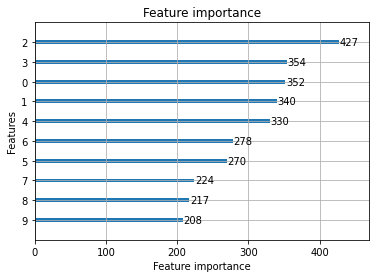

In [159]:
lgb.plot_importance(model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: more than one metric available, picking one to plot.
  """Entry point for launching an IPython kernel.


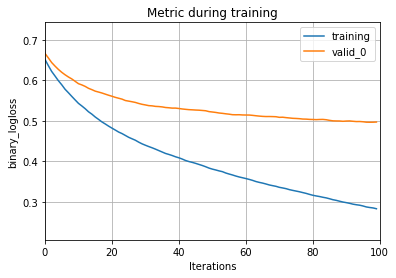

In [160]:
lgb.plot_metric(model)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


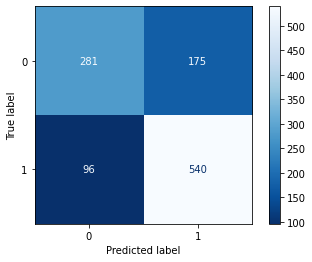

In [161]:
from sklearn import metrics
metrics.plot_confusion_matrix(model,X_test,y_test,cmap='Blues_r')

In [162]:
print(metrics.classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.62      0.67       456
           1       0.76      0.85      0.80       636

    accuracy                           0.75      1092
   macro avg       0.75      0.73      0.74      1092
weighted avg       0.75      0.75      0.75      1092



In [164]:
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout
import numpy as np


In [165]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [166]:
print("X Train shape: ", X_train.shape)
print("X Test shape: ", X_test.shape)

X Train shape:  (4368, 10, 1)
X Test shape:  (1092, 10, 1)


In [167]:
import tensorflow as tf

In [183]:
# Create sequential model 
cnn_model = tf.keras.models.Sequential()
#First CNN layer  with 32 filters, conv window 3, relu activation and same padding
cnn_model.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
#Second CNN layer  with 64 filters, conv window 3, relu activation and same padding
cnn_model.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation='relu'))
#Third CNN layer with 128 filters, conv window 3, relu activation and same padding
cnn_model.add(Conv1D(filters=128, kernel_size=(3,), padding='same', activation='relu'))
#Fourth CNN layer with Max pooling
cnn_model.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
cnn_model.add(Dropout(0.2))
#Flatten the output
cnn_model.add(Flatten())
#Add a dense layer with 256 neurons
cnn_model.add(Dense(units = 256, activation='relu'))
#Add a dense layer with 512 neurons
cnn_model.add(Dense(units = 512, activation='relu'))
#Softmax as last layer with five outputs
cnn_model.add(Dense(units = 1, activation='sigmoid'))

In [184]:
cnn_model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [185]:
cnn_model_history = cnn_model.fit(X_train, y_train, epochs=100, batch_size = 50, validation_data = (X_test, y_test))

Epoch 1/100
88/88 [==============================] - 1s 7ms/step - loss: 0.6731 - accuracy: 0.5964 - val_loss: 0.6765 - val_accuracy: 0.5824
Epoch 2/100
88/88 [==============================] - 0s 5ms/step - loss: 0.6679 - accuracy: 0.6094 - val_loss: 0.6772 - val_accuracy: 0.5833
Epoch 3/100
88/88 [==============================] - 0s 5ms/step - loss: 0.6652 - accuracy: 0.6074 - val_loss: 0.6671 - val_accuracy: 0.5998
Epoch 4/100
88/88 [==============================] - 0s 5ms/step - loss: 0.6630 - accuracy: 0.6197 - val_loss: 0.6674 - val_accuracy: 0.6053
Epoch 5/100
88/88 [==============================] - 1s 7ms/step - loss: 0.6561 - accuracy: 0.6229 - val_loss: 0.6594 - val_accuracy: 0.6108
Epoch 6/100
88/88 [==============================] - 1s 8ms/step - loss: 0.6523 - accuracy: 0.6229 - val_loss: 0.6687 - val_accuracy: 0.5879
Epoch 7/100
88/88 [==============================] - 1s 7ms/step - loss: 0.6506 - accuracy: 0.6261 - val_loss: 0.6712 - val_accuracy: 0.5989
Epoch 8/100
8